1. Install and Import Dependencies

In [29]:
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu117


In [30]:
!cd yolov5 & pip install -r requirements.txt

In [31]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

2. Load Model

In [32]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\merte/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-2-7 Python-3.9.13 torch-1.13.1+cu116 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8191MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [33]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

3. Make Detections

In [34]:
img = 'https://daily.jstor.org/wp-content/uploads/2017/12/traffic_jam_1050x700.jpg'

In [35]:
results = model(img)
results.print()

image 1/1: 700x1050 1 person, 25 cars, 3 buss, 4 trucks
Speed: 158.6ms pre-process, 16.7ms inference, 2.0ms NMS per image at shape (1, 3, 448, 640)


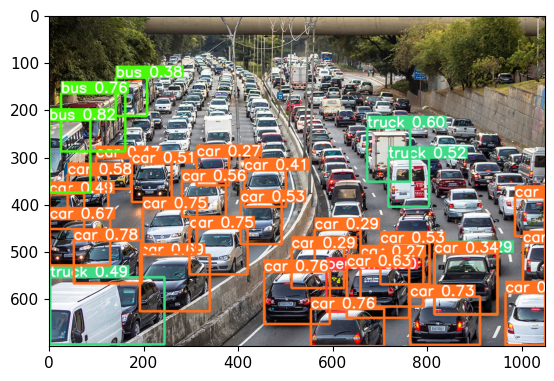

In [36]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()


In [37]:
results.xyxy
#xmin #ymin #xmax #ymax #confidence #class

[tensor([[1.90383e-02, 2.22505e+02, 8.71273e+01, 3.75153e+02, 8.19898e-01, 5.00000e+00],
         [9.66452e+02, 5.87302e+02, 1.05000e+03, 6.98704e+02, 7.91490e-01, 2.00000e+00],
         [5.28292e+01, 4.76047e+02, 1.96177e+02, 5.67695e+02, 7.81677e-01, 2.00000e+00],
         [5.54949e+02, 6.21449e+02, 7.09121e+02, 7.00000e+02, 7.64258e-01, 2.00000e+00],
         [4.55489e+02, 5.42866e+02, 5.94228e+02, 6.53010e+02, 7.62288e-01, 2.00000e+00],
         [2.53721e+01, 1.65001e+02, 1.61528e+02, 2.88209e+02, 7.58636e-01, 5.00000e+00],
         [1.98573e+02, 4.09076e+02, 3.13654e+02, 5.02181e+02, 7.52416e-01, 2.00000e+00],
         [2.97922e+02, 4.50464e+02, 4.20117e+02, 5.48284e+02, 7.51564e-01, 2.00000e+00],
         [7.64176e+02, 5.95670e+02, 9.12559e+02, 6.97771e+02, 7.25048e-01, 2.00000e+00],
         [1.92729e+02, 5.07316e+02, 3.40389e+02, 6.26001e+02, 6.86586e-01, 2.00000e+00],
         [1.01607e+00, 4.31300e+02, 1.29686e+02, 5.29246e+02, 6.66689e-01, 2.00000e+00],
         [6.30605e+02

<function matplotlib.pyplot.show(close=None, block=None)>

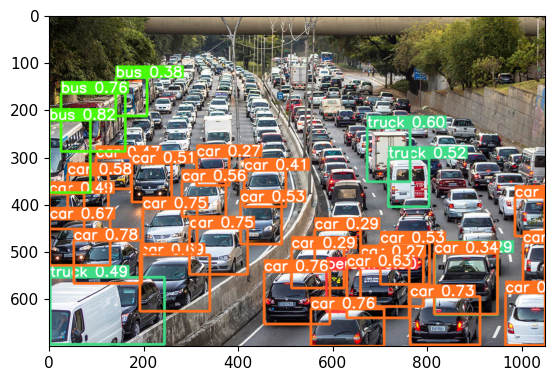

In [38]:
plt.imshow(np.squeeze(results.render()))
plt.show

4. Real Time Detections

In [46]:
cap = cv2.VideoCapture('traffic.mp4')
while cap.isOpened():
    ret, frame = cap.read()

    # Make detections
    results = model(frame)

    cv2.imshow('YOLO', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
    cap.release()
    cv2.destroyAllWindows()

5. Hier kommt noch was